<a href="https://colab.research.google.com/github/Srinidhi231/activity/blob/main/knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
iris_dataset=load_iris()

iris_df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
iris_df.info()
iris_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
X=iris_dataset.data
y=iris_dataset.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=12)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=np.mean(y_pred==y_test)
print("Accuracy:",accuracy)

for i in range(len(X_test)):
    x = X_test[i]
    x_new = np.array([x])
    prediction = knn.predict(x_new)
    print("\n Actual : {0} {1}, Predicted :{2}{3}".format(y_test[i],iris_dataset["target_names"][y_test[i]],prediction,iris_dataset["target_names"][prediction]))


Accuracy: 0.9666666666666667

 Actual : 0 setosa, Predicted :[0]['setosa']

 Actual : 2 virginica, Predicted :[2]['virginica']

 Actual : 0 setosa, Predicted :[0]['setosa']

 Actual : 1 versicolor, Predicted :[1]['versicolor']

 Actual : 2 virginica, Predicted :[2]['virginica']

 Actual : 2 virginica, Predicted :[2]['virginica']

 Actual : 2 virginica, Predicted :[2]['virginica']

 Actual : 0 setosa, Predicted :[0]['setosa']

 Actual : 2 virginica, Predicted :[2]['virginica']

 Actual : 0 setosa, Predicted :[0]['setosa']

 Actual : 1 versicolor, Predicted :[1]['versicolor']

 Actual : 0 setosa, Predicted :[0]['setosa']

 Actual : 0 setosa, Predicted :[0]['setosa']

 Actual : 0 setosa, Predicted :[0]['setosa']

 Actual : 1 versicolor, Predicted :[1]['versicolor']

 Actual : 2 virginica, Predicted :[2]['virginica']

 Actual : 2 virginica, Predicted :[2]['virginica']

 Actual : 1 versicolor, Predicted :[1]['versicolor']

 Actual : 0 setosa, Predicted :[0]['setosa']

 Actual : 1 versicolor

Results for k = 1:
Accuracy: 100.00%

Results for k = 2:
Accuracy: 100.00%

Results for k = 3:
Accuracy: 100.00%

Results for k = 4:
Accuracy: 100.00%

Results for k = 5:
Accuracy: 100.00%

Results for k = 20:
Accuracy: 97.50%

Results for k = 30:
Accuracy: 92.50%



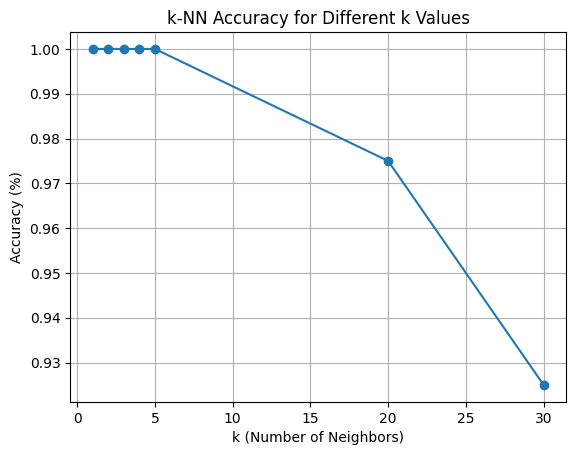

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Step 1: Generate 100 random values for X in the range [0, 1]
X = np.random.rand(100, 1)

# Step 2: Label the first 50 points as follows:
# If xi <= 0.5, then xi belongs to class C1, else class C2
y = np.zeros(100)  # Initialize an array for labels

# Label the first 50 points based on the condition
for i in range(50):
    if X[i] <= 0.5:
        y[i] = 1  # Class C1
    else:
        y[i] = 2  # Class C2

# Label the remaining points based on the same condition
for i in range(50, 100):
    if X[i] <= 0.5:
        y[i] = 1  # Class C1
    else:
        y[i] = 2  # Class C2

# Step 3: Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12)

# Step 4: Implement k-NN for different k values and classify
k_values = [1, 2, 3, 4, 5, 20, 30]
accuracies = []

for k in k_values:
    # Initialize the KNeighborsClassifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict using the test data

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

    # Print the results
    print(f"Results for k = {k}:")
    print(f"Accuracy: {accuracy * 100:.2f}%\n")

# Step 5: Plot the accuracy for different k values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k-NN Accuracy for Different k Values')
plt.grid(True)
plt.show()